# Simulating Scattering Patterns from Molecular Structures

## Theory

See [Centurion et al](https://www.annualreviews.org/doi/abs/10.1146/annurev-physchem-082720-010539) for a full discription of the theory. 

Electrons being scattered by an arbitrary electric field, $V(\vec{r})$, can be described using the Born approximation to the Schrodinger equation via: 

\begin{equation}
\tag{1}
f(\vec{s}) = {m \over 2 \pi \hbar^{2}} \int exp(-i \vec{s} \cdot \vec{r'}) V(\vec{r'}) d^{3} r' 
\end{equation}

where $\vec{s}$ is the momentum transfer of the scattered electron with mass $m$. In MeV-UED experiments, the dominant electron-matter interaction is Coulombic, thus it is possible to represent the scattered wave function by a Fourier transform of the Coulombic potential field. 

\begin{equation}
\tag{2}
f(\vec{s}) = {m e \over 2 \pi \varepsilon_0 \hbar} {1 \over 2} \int exp(-i \vec{s} \cdot \vec{r}) \rho (\vec{r}) d^{3} r 
\end{equation} 

Here, $\rho(\vec{r})$ is the charge distribution of the sample and $s^{-2}$ is a prefactor. Equation 2 shows that the amplitude of the elastic scattering is proportional to the Fourier transform of $\rho(\vec{r})$.

The charge density of the nucleus and the electron of an atom with an atomic number $Z$ can be given by 

\begin{equation}
\tag{3}
\rho(r) = Ze\delta(\vec{r}) + \rho_{e}(r)
\end{equation} 

where $r$ is the radial dimension in spherical coordinates. In combination with the atomic form factor equation of X-ray scattering, $F(s)$

\begin{equation}
\tag{4}
F(s) = 4\pi \int \rho_{e}(r) {\sin (sr) \over sr} r^{2} dr
\end{equation} 

equation 2 can be rewritten as 

\begin{equation} 
\tag{5}
f(s) = {me^{2} \over 2 \pi \varepsilon_{0} \hbar^{2}} {1 \over 2} \lbrack Z-F(s) \rbrack
\end{equation} 

Assuming the independent atom model (IAM), the elastic scattering of a molecule made of $N$ atoms is defined as 

\begin{equation}
\tag{6}
f_{M}(\vec{s}) = \sum_{i=1}^{N} f_{i} (s) e^{i\vec{s} \cdot \vec{r_{i}}}
\end{equation}

where $f_{i}(s)$ is the atomic form factor of the atom as given by Equation 5 and $\vec{r_{i}}$ is the position of vector of the atom. 

Following this, the total scattering of the molecule $I(s)$ of randomly oriented molecules can be found by 

\begin{equation}
\tag{7}
I(s) = I_{at} + I_{mol} = \sum_{i=1}^{N} |f_{i}(s)|^{2} + \sum_{i=1}^{N} \sum_{j=1, j \neq i}^{N} f_{i}^{\ast}(s) f_{j}(s) { \sin (s r_{ij}) \over s r_{ij}}
\end{equation}

Equation 7 gives the result of the IAM of a rigid molecule of an randomly oriented ensemble. See Centurion et al for additional corrections to Equation 7. 

When processing MeV-UED data, the scattering signal is best represented by 

\begin{equation}
\tag{8}
sM(s) = s {I_{mol} \over I_{at}}
\end{equation} 

The real-space pair distribution function (PDF) is found to be proportional to the probability of finding an atom pair at a distance $r$. This probability is given by

\begin{equation} 
\tag{9}
P(r) = r \int_{0}^{\infty} sM(s) \sin{sr} ds \approx r \int_{s_{min}}^{s_{max}} sM(s) \sin(sr) e^{-\alpha s^{2}} ds
\end{equation} 

As no experiment can measure out to an infinite $s$ value, the above approximation is applied where $e^{-\alpha s^{2}}$ is a damping factor. The following code produces simulated scattering patters based on computed xyz coordinates of a given molecule. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import gued_theory as gt

angs = '\u00C5' # Angstrom sign
path_mol='packages/Molecular_coordinates/' # The molecular .xyz/.csv pathes

## Simulate Static Diffraction

In [2]:
# path_dcs='/sdf/data/lcls/ds/ued_testfac/scratch/gued_online_analysis/jupyter_notebook/user_notebooks/dcs_repository/3.7MeV/';
mol_name='cf3i_opt'
file_type='.xyz' # Molecular geometries, .xyz or .csv file, coordinates saved in 'Molecular_coordinates'

s_max = 12 # Max Q range
r_max = 800  # Max R range
damp_const=33

### Get Static sM and PDF

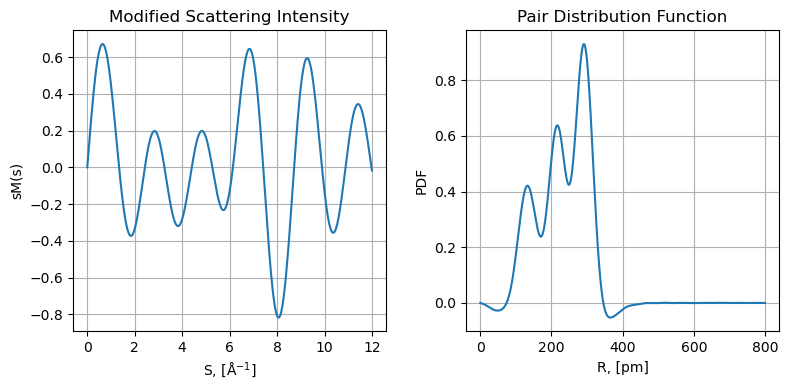

In [3]:
gt.static_sim(path_mol, mol_name, file_type, plot=True)

## Get Time Resolved Pattern

count =  1150
4


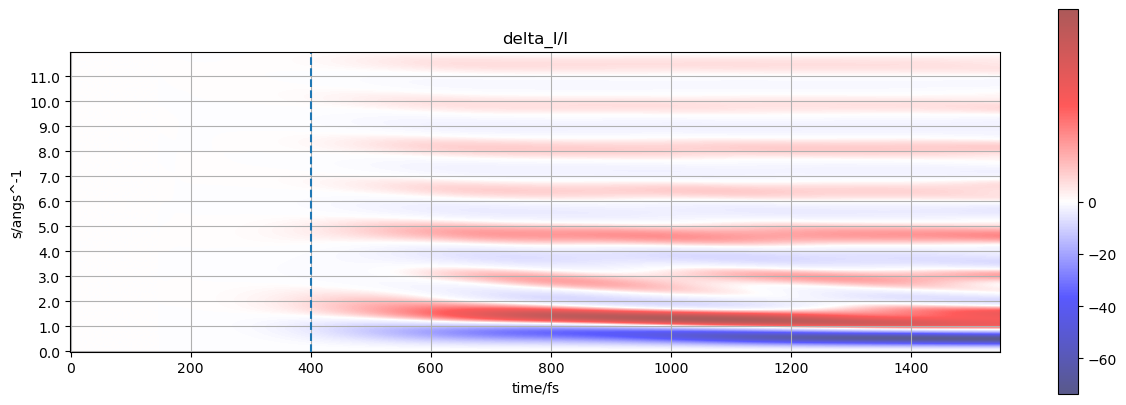

In [4]:
mol_name = 'CI2H2_time_evol'
gt.trajectory_sim(path_mol, mol_name, file_type)

## Frequency Mode Diffraction Pattern

277.2042
fs= 120.6504665279664


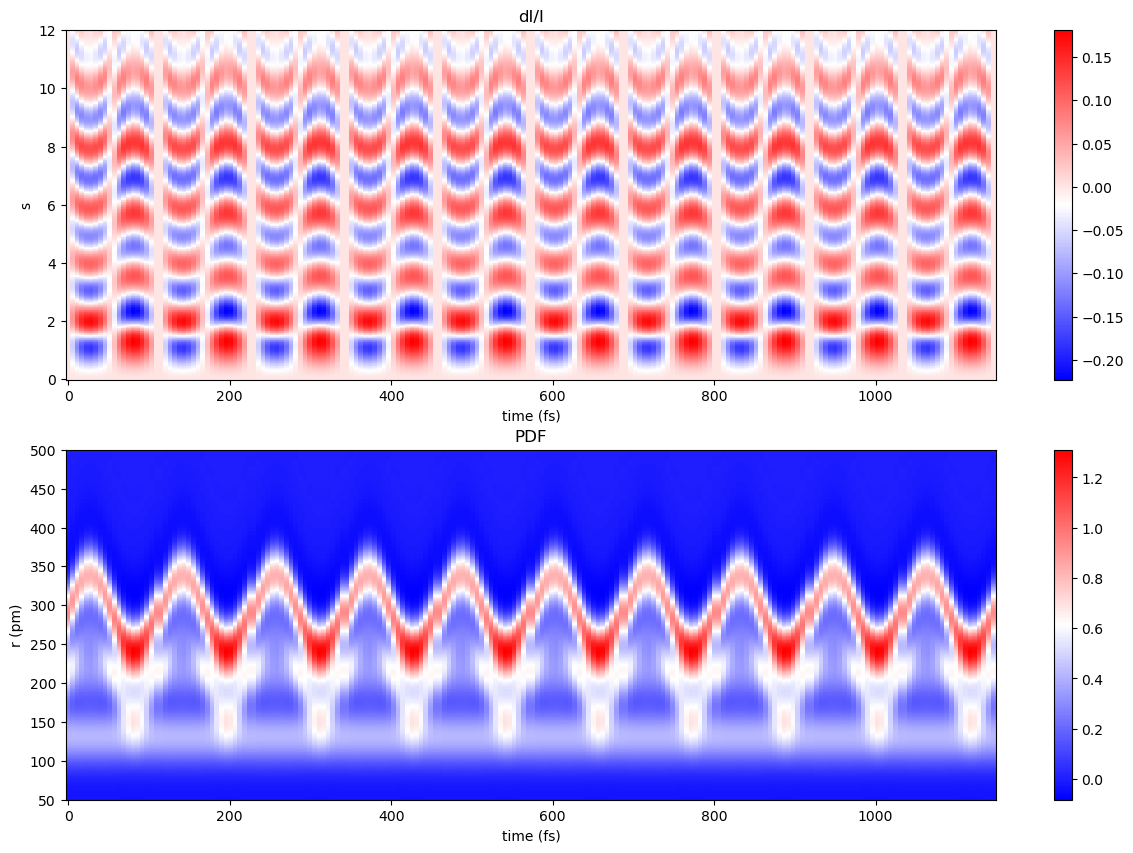

In [5]:
mol_name = 'cf3i_opt.hess.v008'
file_type='.xyz' # Molecular geometries, .xyz or .csv file, coordinates saved in 'Molecular_coordinates'
dI_I, time, s_new, PDF, r_new = gt.freq_sim(path_mol, mol_name, file_type, plot=True)

## Simulating Fragmentation

Simulates a diffraction pattern based on the a unimolecular dissociation following: 

\begin{equation}
reactant \longrightarrow fragment_1 + fragment_2
\end{equation}

where the sum of fragments = reactant. __Code can take any number of fragments.__ 

In [6]:
angs = '\u00C5' # Angstrom sign
path_mol='packages/Molecular_coordinates/'; # The molecular .xyz/.csv pathes
# path_dcs='/sdf/data/lcls/ds/ued_testfac/scratch/gued_online_analysis/jupyter_notebook/user_notebooks/dcs_repository/3.7MeV/';
reactant='o-ntph_opt'
products = ['ntph_nohono', 'hono']
#reactant = 'cf3i_opt'
#products = ['cf3', 'i']

file_type='.xyz'; # Molecular geometries, .xyz or .csv file, coordinates saved in 'Molecular_coordinates'

s_max = 12 # Max Q range
r_max = 800  # Max R range
damp_const=33

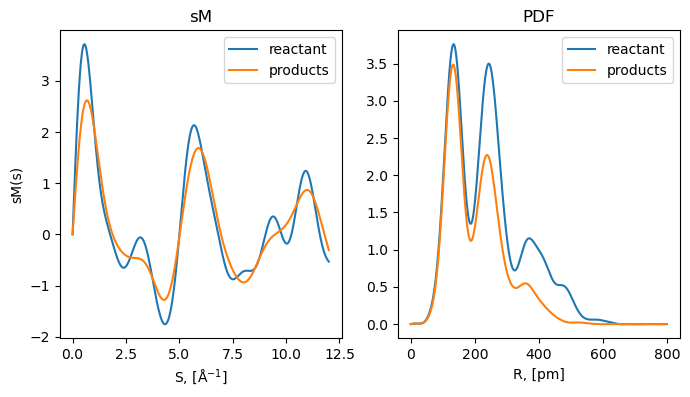

In [8]:
dsM, s, dPDF, r = gt.dissoc_sim(path_mol, reactant, products, file_type, plot=True)